# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [ ] Считать данные и вывести их основные характеристики, описание признаков.
- [ ] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [ ] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [ ] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [ ] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [ ] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).


In [166]:
# Импорты

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset
Используемый набор данных: [US Mass Shootings (ver 5)](https://www.kaggle.com/datasets/zusmani/us-mass-shootings-last-50-years/data?select=Mass+Shootings+Dataset+Ver+5.csv)

Признаки:  

* S# - Индекс
* Title - Заголовок
* Location - Местоположение (город, штат)
* Date - Дата
* Incident Area - Место происшествия
* Open/Close Location - Открытая / закрытая локация
* Target - Цель нападения
* Cause - Причина нападения
* Summary - Описание
* Fatalities - Кол-во смертей
* Injured - Кол-во раненых
* Total victims - Общее кол-во жертв
* Policeman Killed - Кол-во убитых полицейских
* Age - Возраст нападавшего
* Employeed (Y/N) - Трудоустроен ли нападавший
* Employed at - Место работы нападавшего
* Mental Health Issues - Были ли психические расстройства
* Race - Раса нападавшего
* Gender - Пол нападавшего
* Latitude - Широта
* Longitude - Долгота

Поставим задачу регрессии: определить количество пострадавших **(Total victims)** в зависимости от остальных признаков.

Чтение данных

In [167]:
df = pd.read_csv("Mass Shootings Dataset Ver 5.csv", encoding='ISO-8859-1')
df.shape

(323, 21)

In [168]:
df.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


Основные характеристики

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S#                    323 non-null    int64  
 1   Title                 323 non-null    object 
 2   Location              278 non-null    object 
 3   Date                  323 non-null    object 
 4   Incident Area         261 non-null    object 
 5   Open/Close Location   295 non-null    object 
 6   Target                318 non-null    object 
 7   Cause                 246 non-null    object 
 8   Summary               323 non-null    object 
 9   Fatalities            323 non-null    int64  
 10  Injured               323 non-null    int64  
 11  Total victims         323 non-null    int64  
 12  Policeman Killed      317 non-null    float64
 13  Age                   179 non-null    object 
 14  Employeed (Y/N)       67 non-null     float64
 15  Employed at           4

In [170]:
df.describe()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,317.000000,67.000000,303.000000,303.000000
mean,162.000000,4.436533,6.176471,10.263158,0.129338,0.626866,37.225076,-94.429539
std,93.386294,5.783208,29.889182,33.662309,0.610294,0.487288,5.536365,16.513296
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,21.325512,-161.792752
25%,81.500000,1.000000,1.000000,4.000000,0.000000,0.000000,33.571459,-110.205485
50%,162.000000,3.000000,3.000000,5.000000,0.000000,1.000000,36.443290,-88.122998
75%,242.500000,5.500000,5.000000,9.000000,0.000000,1.000000,41.483844,-81.703237
max,323.000000,59.000000,527.000000,585.000000,5.000000,1.000000,60.790539,-69.707823


# Data cleaning & Feature engineering

S# - Просто индекс. Уберём его сразу.

In [171]:
df.drop(["S#"], axis=1, inplace=True)

Проверяем долю пропущенных значений

In [172]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

Employed at             87.306502
Employeed (Y/N)         79.256966
Age                     44.582043
Cause                   23.839009
Incident Area           19.195046
Location                13.931889
Open/Close Location      8.668731
Longitude                6.191950
Latitude                 6.191950
Policeman Killed         1.857585
Target                   1.547988
Race                     0.619195
Gender                   0.000000
Mental Health Issues     0.000000
Title                    0.000000
Injured                  0.000000
Fatalities               0.000000
Summary                  0.000000
Date                     0.000000
Total victims            0.000000
dtype: float64

Признаки **Employed at** и **Employeed (Y/N)** имеют слишком много пропущенных значений. Уберём их.

In [173]:
df.drop(["Employed at", "Employeed (Y/N)"], axis=1, inplace=True)


Также пропущенные значения имеются в признаках "Age", "Cause", "Incident Area", "Location", "Open/Close Location", "Longitude", "Latitude", "Policeman Killed", "Target" и "Race". Учтем это при дальнейшей очистке данных.

Признак **Date** можно представить в виде чисел, разбив на признаки **Day**, **Month** и **Year**

In [174]:
df[["Month","Day","Year"]] = df["Date"].str.split("/", expand=True)
df.drop(["Date"], axis=1, inplace=True)

Признак **Location** можно разбить на **City** и **State**

In [175]:
df[["City","State"]] = df["Location"].str.rsplit(",", n=1, expand=True)
df.drop(["Location"], axis=1, inplace=True)

df["State"].unique()

array([' TX', ' CO', ' MD', ' NV', ' CA', ' PA', ' Florida', ' Ohio',
       ' California', ' WA', ' LA', ' Texas', ' Missouri', nan,
       ' Virginia', ' North Carolina', ' Tennessee', ' Texas ',
       ' Kentucky', ' Alabama', ' Pennsylvania', ' Kansas',
       ' Massachusetts', '  Virginia', ' Washington', ' Arizona',
       ' Michigan', ' Mississippi', ' Nebraska', ' Colorado',
       ' Minnesota', ' Georgia', ' Maine', ' Oregon', ' South Dakota',
       ' New York', ' Louisiana', ' Illinois', ' South Carolina',
       ' Wisconsin', ' Montana', ' New Jersey', ' Indiana', ' Oklahoma',
       ' New Mexico', ' Idaho', ' West Virginia', ' Nevada', None,
       ' Connecticut', ' Arkansas', ' Utah', ' Vermont', ' Hawaii',
       ' Alaska', ' Wyoming', ' Iowa'], dtype=object)

Как можно видеть, штаты представлены аббревиатурами и полными названиями. Следует все привести к одному виду.

In [176]:
df["State"] = df["State"].str.strip() # Избавимся от пробелов
abbreviations = df[df["State"].str.len() < 3] # Получим все полные наименования
abbreviations["State"].unique()

array(['TX', 'CO', 'MD', 'NV', 'CA', 'PA', 'WA', 'LA'], dtype=object)

In [177]:
df = df.replace({"State": {"LA": "Louisiana", "WA": "Washington", "TX": "Texas", "PA": "Pennsylvania", 
                           "NV": "Nevada", "MD": "Maryland", "CA": "California", "CO": "Colorado"}})
df["State"].value_counts()

State
California        31
Florida           20
Texas             18
Washington        15
Georgia           13
Arizona           11
North Carolina    11
Ohio              10
New York          10
Pennsylvania       9
Alabama            9
Wisconsin          9
Illinois           9
Colorado           7
Michigan           6
Nevada             6
Virginia           6
South Carolina     5
Kentucky           5
Louisiana          5
Oklahoma           5
Tennessee          5
Oregon             4
Minnesota          4
Mississippi        4
Massachusetts      4
Kansas             4
Nebraska           3
Missouri           3
New Jersey         3
New Mexico         3
Connecticut        3
Arkansas           2
Montana            2
Utah               2
Wyoming            1
Alaska             1
Hawaii             1
Vermont            1
Maryland           1
West Virginia      1
Idaho              1
Maine              1
Indiana            1
South Dakota       1
Iowa               1
Name: count, dtype: int64

Городов довольно много, но штатов США всего 50 (в нашем случае только 46), поэтому можем их пронумеровать

In [178]:
df["StateID"] = df["State"].astype('category').cat.codes
df.loc[df["StateID"] == -1, "State"] = "Unknown" # заполняем пропущенные значения State
df[["State", "StateID"]].sort_values(by=["StateID"]).value_counts(sort = False).head()

State       StateID
Alabama     0           9
Alaska      1           1
Arizona     2          11
Arkansas    3           2
California  4          31
Name: count, dtype: int64

Для нашего исследования будет достаточно информации о штате инцидента, поэтому городом и координатами можно пренебречь

In [179]:
df.drop(["City", "Latitude", "Longitude"], axis=1, inplace=True)

Проверим зависимость между признаками **Injured**, **Fatalities**, **Policeman Killed** и **Total victims**

In [180]:
corrTest = df[["Total victims"]]
corrTest["TotalSum"] = df["Injured"].fillna(0) + df["Fatalities"].fillna(0) + df["Policeman Killed"].fillna(0)
corrTest.corr()["TotalSum"]["Total victims"]

0.9996927379523898

Как можно видеть, корреляция между **Total victims** и суммой остальных признаков почти равна 1 (немного меньше, т.к. в данных присутствуют неточности). Следовательно, можно оставить только признак **Total victims**.

In [181]:
df.drop(["Injured", "Fatalities", "Policeman Killed"], axis=1, inplace=True)

Рассмотрим признак **Target**

Total unique:  54


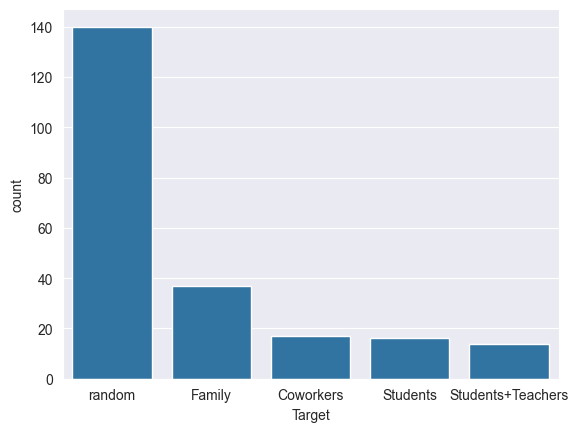

In [182]:
print("Total unique: ", df["Target"].nunique())
sns.countplot(df, x="Target", order=df["Target"].value_counts().iloc[:5].index);

Как можно видеть, чаще всего целью стрелков являлись случайные люди, семья, коллеги, студенты и учителя. Уникальных значений признака довольно много и большинство из них неинформативны, поэтому следует от него избавиться.

In [183]:
df.drop(["Target"], axis=1, inplace=True)

Рассмотрим признак **Incident Area**

Total unique:  175


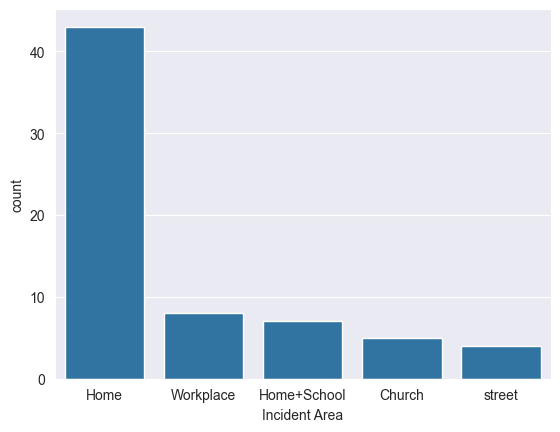

In [184]:
print("Total unique: ", df["Incident Area"].nunique())
sns.countplot(df, x="Incident Area", order=df["Incident Area"].value_counts().iloc[:5].index);

**Incident Area** также имеет очень много уникальных значений. Чаще всего преступления совершались дома, на работе, в школах и церквях. Для анализа будет достаточно признака **Open/Close Location**, так что **Incident Area** можно убрать.

In [185]:
df.drop(["Incident Area"], axis=1, inplace=True)

Заполним пропуски в оставшихся категориальных признаках

In [187]:
df[["Cause", "Race", "Open/Close Location"]] = df[["Cause", "Race", "Open/Close Location"]].fillna("Unknown")

Некоторые категории можно объединить

In [188]:
df["Cause"].replace("unknown", "Unknown", inplace=True)

df["Race"].replace(["Other", "Some other race", "Black American or African American/Unknown", "White American or European American/Some other Race", "Asian American/Some other race"], "Unknown", inplace=True)
df["Race"].replace(["white", "black"], ["White", "Black"], inplace=True)

df["Open/Close Location"].replace("Open+CLose", "Open+Close", inplace=True)

df["Gender"].replace("M", "Male", inplace=True)
df["Gender"].replace(["M/F", "Male/Female"], "Unknown", inplace=True)

df["Mental Health Issues"].replace(["unknown", "Unclear"], "Unknown", inplace=True)

pd.DataFrame(data={'Categories': [df["Cause"].unique(), df["Race"].unique(), df["Open/Close Location"].unique(), df["Gender"].unique(), df["Mental Health Issues"].unique()]},
             index=['Cause', 'Race', 'Open/Close Location', 'Gender', 'Mental Health Issues']) 

,Categories
Cause,"[Unknown, terrorism, unemployement, racism, fr..."
Race,"[White, Black, Asian, Unknown, Latino, Black A..."
Open/Close Location,"[Close, Open, Unknown, Open+Close]"
Gender,"[Male, Unknown, Female]"
Mental Health Issues,"[No, Unknown, Yes]"


В признаке **Age** встречаются значения - списки возрастов. Это может относиться к инцидентам, где нападение было совершенно группой людей. В таком случае можно заменить возраст на средний по группе.

In [189]:
df["Age"] = [np.mean(list(map(int, x))) if type(x) is list else x for x in df["Age"].str.split(",").to_numpy()]

Пропущенные значения можно заменить медианой

In [190]:
df["Age"].fillna(df["Age"].median(), inplace=True)

Проверим пропуски

In [191]:
df.isnull().sum().sort_values(ascending=False)

Title                   0
Open/Close Location     0
Cause                   0
Summary                 0
Total victims           0
Age                     0
Mental Health Issues    0
Race                    0
Gender                  0
Month                   0
Day                     0
Year                    0
State                   0
StateID                 0
dtype: int64

 Пропущенных значений не осталось. Признаки **Title** и **Summary** также не важны, их можно удалить.

In [192]:
df.drop(["Title", "Summary"], axis=1, inplace=True)

### Итоговый датасет

In [193]:
df.head()

,Open/Close Location,Cause,Total victims,Age,Mental Health Issues,Race,Gender,Month,Day,Year,State,StateID
0,Close,Unknown,46,26.0,No,White,Male,11,5,2017,Texas,38
1,Open,Unknown,3,47.0,No,White,Male,11,1,2017,Colorado,5
2,Close,Unknown,6,37.0,No,Black,Male,10,18,2017,Maryland,18
3,Open,Unknown,585,64.0,Unknown,White,Male,10,1,2017,Nevada,26
4,Close,Unknown,5,38.0,Yes,Asian,Male,6,14,2017,California,4


Категориальные признаки можно пронумеровать (но пока не стоит этого делать, т.к. они не являются порядковыми. Впрочем, как и State)

# Анализ признаков

Посмотрим зависимость между годом происшествия и количеством жертв

Text(0, 0.5, 'Count')

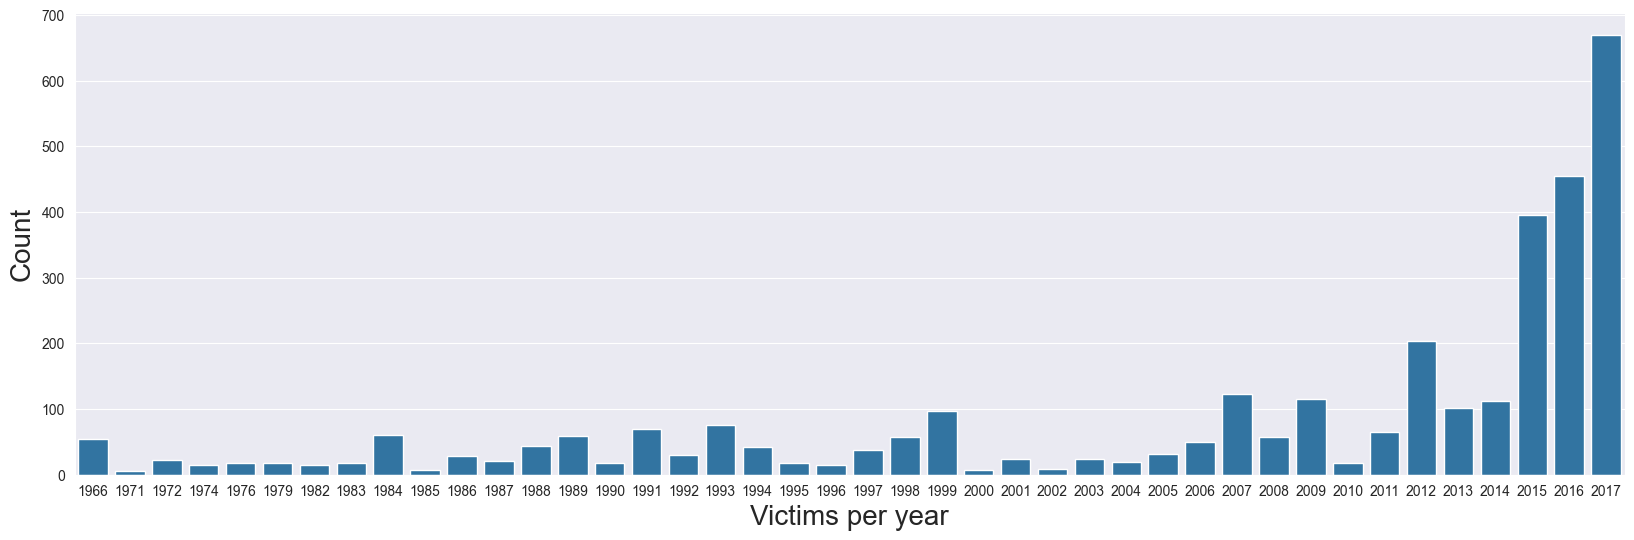

In [194]:
victims_per_year = df.groupby("Year")["Total victims"].sum()
victims_per_year_df = victims_per_year.reset_index()
victims_per_year_df.columns = ['Year', 'Total victims']

plt.figure(figsize=(20,6))
sns.barplot(x = 'Year', y = 'Total victims', data = victims_per_year_df)
plt.xlabel("Victims per year", fontsize=20)
plt.ylabel("Count", fontsize=20)


Как можно видеть, число жертв резко увеличилось к 2015-2017 годам.

Посмотрим распределение кол-ва инцидентов по штатам.

<Figure size 1100x600 with 0 Axes>

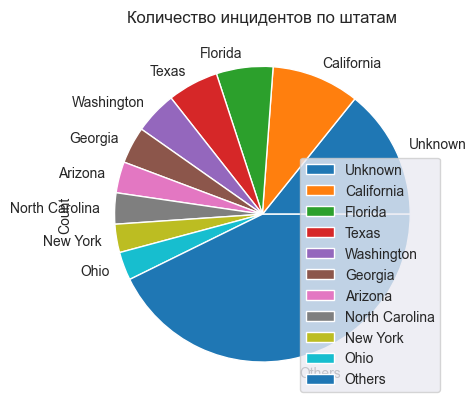

In [195]:
states_series = df["State"].value_counts().sort_values(ascending = False)
states_df = pd.DataFrame({'State':states_series.index, 'Count':states_series.values})

states_number = 10

states_top = states_df[:states_number].copy()

others_row = pd.DataFrame(data = {
    'State' : ['Others'],
    'Count' : [states_df['Count'][states_number:].sum()]
})

df2 = pd.concat([states_top, others_row])

plt.figure(figsize=(11,6))
df2.plot(kind = 'pie', y = 'Count', labels = df2['State'], title="Количество инцидентов по штатам")
plt.show()



Как можно видеть, наибольшее число инцидентов происходило в Калифорнии, Флориде и Техасе.

Проанализируем частоту инцидентов в зависимости от пола.

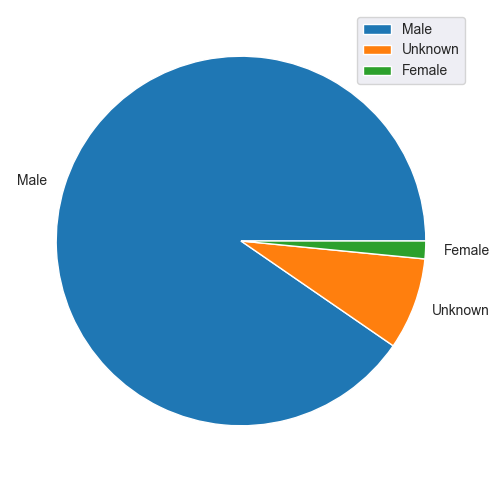

In [196]:
plt.figure(figsize=(11,6))
gender = df["Gender"].value_counts()
plt.pie(gender.values, labels = gender.index)
plt.legend()
plt.show()

Оказывается, чаще всего участниками нападений являлись мужчины.

Проверим, есть ли зависимость между расой и частотой инцидентов.

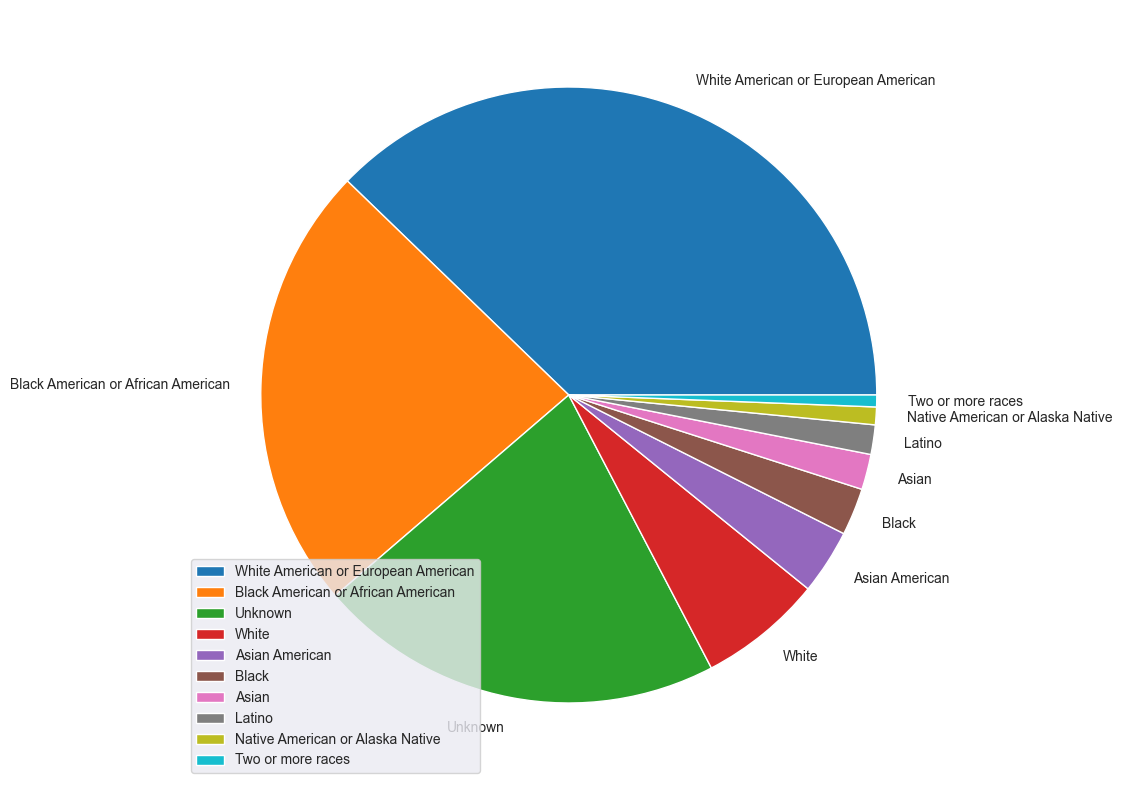

In [197]:
plt.figure(figsize=(26,10))
race = df["Race"].value_counts()
plt.pie(race.values, labels = race.index)
plt.legend(loc="lower left")
plt.show()

Чаще в стрельбе принимали участие белые американцы, хотя значение и несильно отличается для черных американцев.
Таким образом, среднестатистический стрелок - белый или черный американец мужского пола.

Проверим корреляцию признаков.

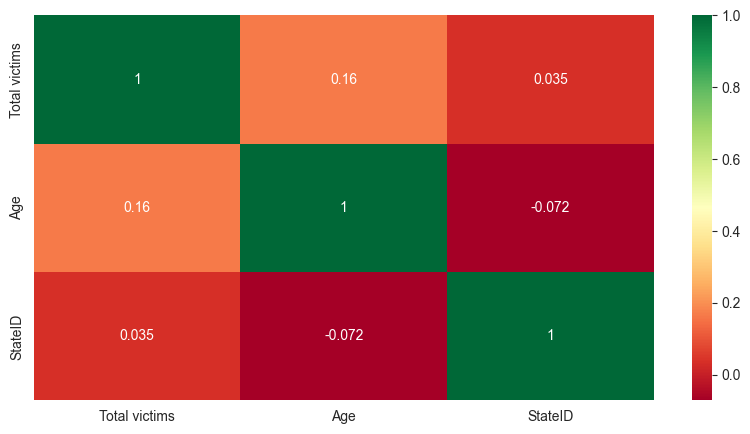

In [198]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Числовых признаков осталось всего 3, причем они между собой почти не коррелируют.